In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('houseprice.csv')
data

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace,Price
0,1.982,1.0,3,2.00,133,0,14.2212
1,1.676,1.5,3,0.38,14,1,13.4865
2,1.694,2.0,3,0.96,15,1,11.8007
3,1.800,1.0,2,0.48,49,1,13.8297
4,2.088,1.0,3,1.84,29,1,12.9470
...,...,...,...,...,...,...,...
1042,1.802,2.0,4,0.97,56,1,10.7695
1043,3.239,3.5,4,2.50,1,1,23.6737
1044,1.440,2.0,2,0.61,66,1,15.4829
1045,2.030,2.5,3,1.00,3,1,17.9492


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Living Area  1047 non-null   float64
 1   Bathrooms    1047 non-null   float64
 2   Bedrooms     1047 non-null   int64  
 3   Lot Size     1047 non-null   float64
 4   Age          1047 non-null   int64  
 5   Fireplace    1047 non-null   int64  
 6   Price        1047 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 57.4 KB


# Explolatory Data Analysis(EDA)

In [41]:
data.describe().style.background_gradient('CMRmap_r')

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace,Price
count,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000
mean,1.807303,1.918338,3.183381,0.569580,28.061127,0.593123,16.386213
std,0.641461,0.641735,0.750265,0.777879,34.900899,0.491486,6.765156
min,0.672000,1.000000,1.000000,0.000000,0.000000,0.000000,1.685800
25%,1.336000,1.500000,3.000000,0.210000,6.000000,0.000000,11.201400
50%,1.672000,2.000000,3.000000,0.390000,18.000000,1.000000,15.191700
75%,2.206000,2.500000,4.000000,0.600000,34.000000,1.000000,20.523500
max,4.534000,4.500000,6.000000,9.000000,247.000000,1.000000,44.643600


In [42]:
data.corr()

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace,Price
Living Area,1.000000,0.722649,0.664347,0.200180,-0.263168,0.481436,0.776396
Bathrooms,0.722649,1.000000,0.491798,0.100993,-0.443830,0.444700,0.670189
Bedrooms,0.664347,0.491798,1.000000,0.140682,-0.060598,0.295873,0.471074
Lot Size,0.200180,0.100993,0.140682,1.000000,0.015135,0.052765,0.155284
Age,-0.263168,-0.443830,-0.060598,0.015135,1.000000,-0.248794,-0.363354
Fireplace,0.481436,0.444700,0.295873,0.052765,-0.248794,1.000000,0.460237
Price,0.776396,0.670189,0.471074,0.155284,-0.363354,0.460237,1.000000


<Axes: >

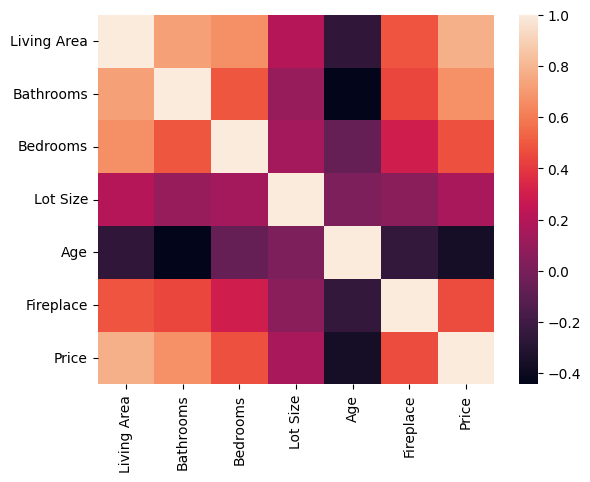

In [47]:
import seaborn as sns 
sns.heatmap(data.corr())

In [63]:
columns=['Living Area','Bathrooms','Bedrooms','Lot Size','Age','Fireplace','Price']
for i in columns:
    fig=px.histogram(data[i])
    fig.show()

<Axes: ylabel='Density'>

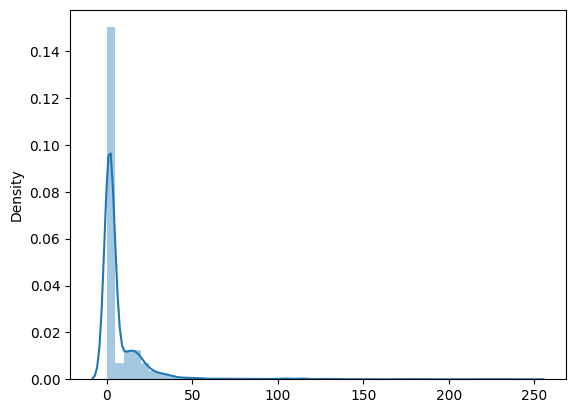

In [68]:
sns.distplot(data)

In [5]:
data.isnull().sum()

Living Area    0
Bathrooms      0
Bedrooms       0
Lot Size       0
Age            0
Fireplace      0
Price          0
dtype: int64

In [69]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [70]:
x

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace
0,1.982,1.0,3,2.00,133,0
1,1.676,1.5,3,0.38,14,1
2,1.694,2.0,3,0.96,15,1
3,1.800,1.0,2,0.48,49,1
4,2.088,1.0,3,1.84,29,1
...,...,...,...,...,...,...
1042,1.802,2.0,4,0.97,56,1
1043,3.239,3.5,4,2.50,1,1
1044,1.440,2.0,2,0.61,66,1
1045,2.030,2.5,3,1.00,3,1


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1500)


# Using LinearRegression


In [74]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [75]:
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

In [76]:
from sklearn.metrics import accuracy_score,confusion_matrix
pred_df=pd.DataFrame({'Actual':y_test,'Prediction':y_pred_test})
pred_df

,Actual,Prediction
10,30.9808,21.703861
552,11.7703,15.950250
28,31.0696,24.773128
1016,12.4939,10.633972
78,10.1258,11.148246
...,...,...
546,8.5939,15.920997
714,10.9259,11.396779
12,8.0248,14.100667
788,20.9371,20.220440


# Validation

In [78]:
#Accuracy
import sklearn
from sklearn import metrics
print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(y_test, y_pred_test))  
print('Mean Squared Error:', sklearn.metrics.mean_squared_error(y_test, y_pred_test))  
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred_test)))

Mean Absolute Error: 2.8415340987073954
Mean Squared Error: 15.294052466232573
Root Mean Squared Error: 3.9107611108622544


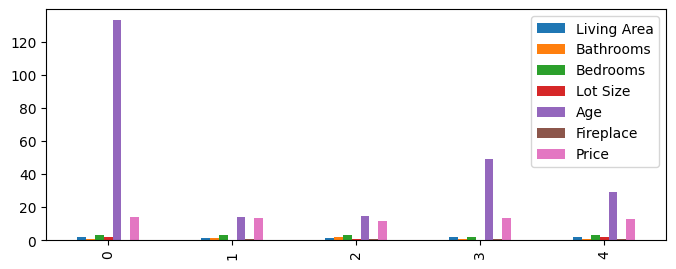

In [84]:
#Actual vs prediction plotting
df1 = data.head(5)
df1.plot(kind='bar',figsize=(8,3))
plt.plot(which='major', linestyle='-', linewidth='0.5', color='red')
plt.plot(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# DecisionTreeRegressor

In [89]:
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [90]:
y_pred=model.predict(x_test)

In [91]:
df=pd.DataFrame({'Actual':y_test,'Prediction':y_pred})
df

,Actual,Prediction
10,30.9808,23.8792
552,11.7703,11.0115
28,31.0696,30.8253
1016,12.4939,10.7919
78,10.1258,10.2806
...,...,...
546,8.5939,15.9786
714,10.9259,12.6049
12,8.0248,17.0567
788,20.9371,19.2694


# Validation

In [98]:
#Accuracy
import sklearn
from sklearn import metrics
print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', sklearn.metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.4059742857142856
Mean Squared Error: 25.073153680666664
Root Mean Squared Error: 5.0073100244209625


# RandomForestRegressor

In [93]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [95]:
y_pred1=model.predict(x_test)

In [96]:
df2=pd.DataFrame({'Actual':y_test,'Prediction':y_pred1})
df2

,Actual,Prediction
10,30.9808,23.467595
552,11.7703,12.381082
28,31.0696,30.326916
1016,12.4939,11.627047
78,10.1258,11.264797
...,...,...
546,8.5939,15.575853
714,10.9259,11.938503
12,8.0248,14.908277
788,20.9371,20.444779


# validation

In [99]:
#Accuracy
import sklearn
from sklearn import metrics
print('Mean Absolute Error:', sklearn.metrics.mean_absolute_error(y_test, y_pred1))  
print('Mean Squared Error:', sklearn.metrics.mean_squared_error(y_test, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 2.5301383130838997
Mean Squared Error: 13.380492374212201
Root Mean Squared Error: 3.6579355344527604
